# Churn Prédiction

## 1. Dataset Source

Dataset source\
https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

## 2. Import some librairies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score

## 3. Load the data from a csv file

In [3]:
raw_data = pd.read_csv("Churn_Modelling.csv")
print(raw_data.shape)
raw_data.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 4. Data Pre-processing

### 4.1. Drop unimportant columns

In [5]:
raw_data = raw_data.drop(["RowNumber","CustomerId","Surname"], axis=1)
raw_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 4.2. Check missing datas

In [6]:
raw_data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
raw_data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### 4.3. Show some statistics on the Data

#### 4.3.1 Describe the data

In [8]:
raw_data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### 4.3.2 Number of people who churn or not

In [9]:
exit_rate = raw_data["Exited"].value_counts()
exit_rate

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
print((exit_rate[0]/(exit_rate[0]+exit_rate[1])*100), "% of customers are in the company")
print((exit_rate[1]/(exit_rate[0]+exit_rate[1])*100), "% of customers left the company")

79.63 % of customers are in the company
20.369999999999997 % of customers left the company


/home/komlan/anaconda3/envs/anaconda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Exited', ylabel='count'>

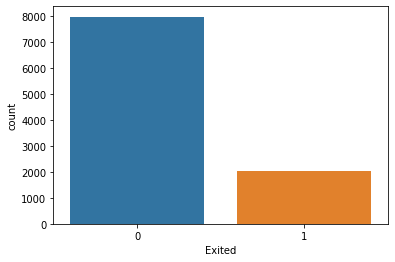

In [11]:
sns.countplot(raw_data["Exited"])

### 4.4. Relationship between features

#### 4.4.1 Categorials features

##### - Gender and Exited

<AxesSubplot:xlabel='Gender', ylabel='count'>

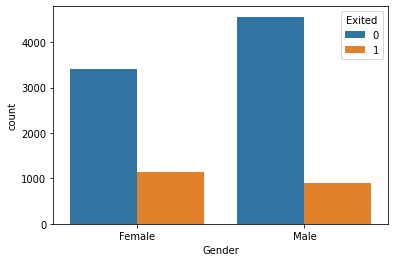

In [12]:
sns.countplot(x="Gender", hue="Exited", data=raw_data)

##### - Geography and Exited

<AxesSubplot:xlabel='Geography', ylabel='count'>

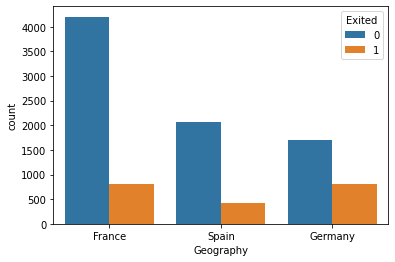

In [13]:
sns.countplot(x="Geography", hue="Exited", data=raw_data)

#### 4.4.2 Continuous features

##### - DIstributions

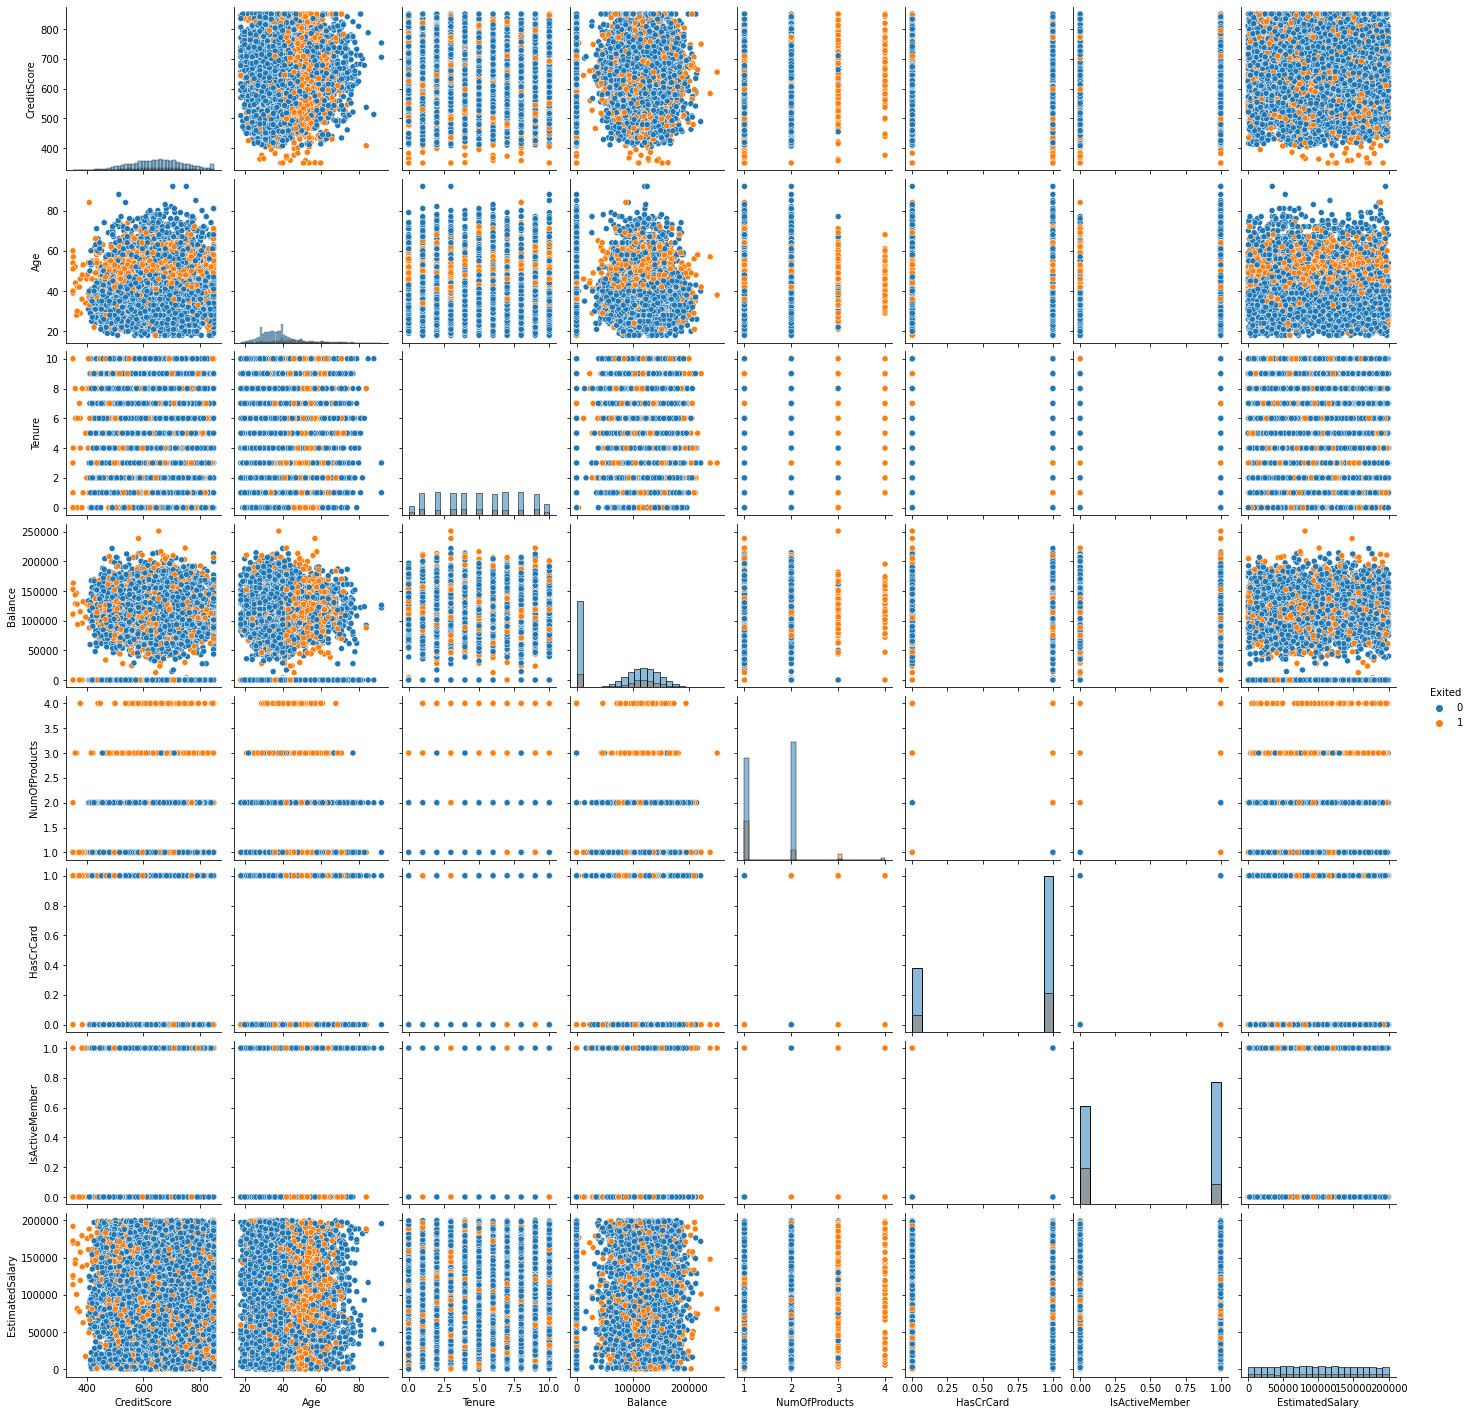

In [14]:
sns.pairplot(raw_data, hue="Exited", diag_kind="hist")

##### - Corelation Map of features

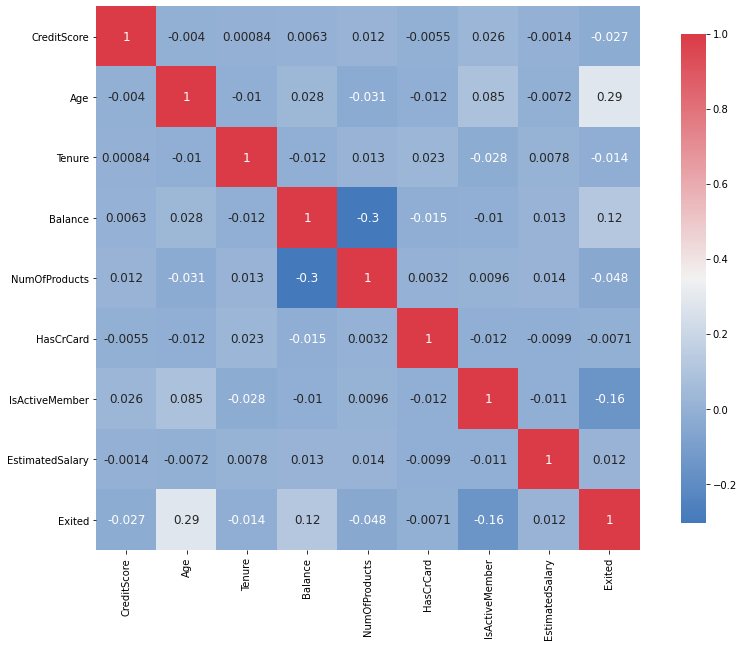

In [15]:
s , ax = plt.subplots(figsize =( 15 , 10))
cmap = sns.diverging_palette(250 , 10 , as_cmap = True )
s = sns.heatmap(raw_data.corr(), cmap = cmap, square=True,ax=ax, annot = True,cbar_kws={'shrink' : .9 }, annot_kws = {'fontsize':12})

## 4.5. Transform categorical features to numerical

In [16]:
label_encoder = LabelEncoder()
for column in raw_data.columns:
    if raw_data.dtypes[column] == object:
        raw_data[column] = label_encoder.fit_transform(raw_data[column])
raw_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


## 4.6. Split Data to Train and Test datas

In [17]:
X = raw_data.drop("Exited", axis=1)
y = raw_data["Exited"].values
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=42)

## 5. Build a models

### 5.1. Build Decision Tree: 

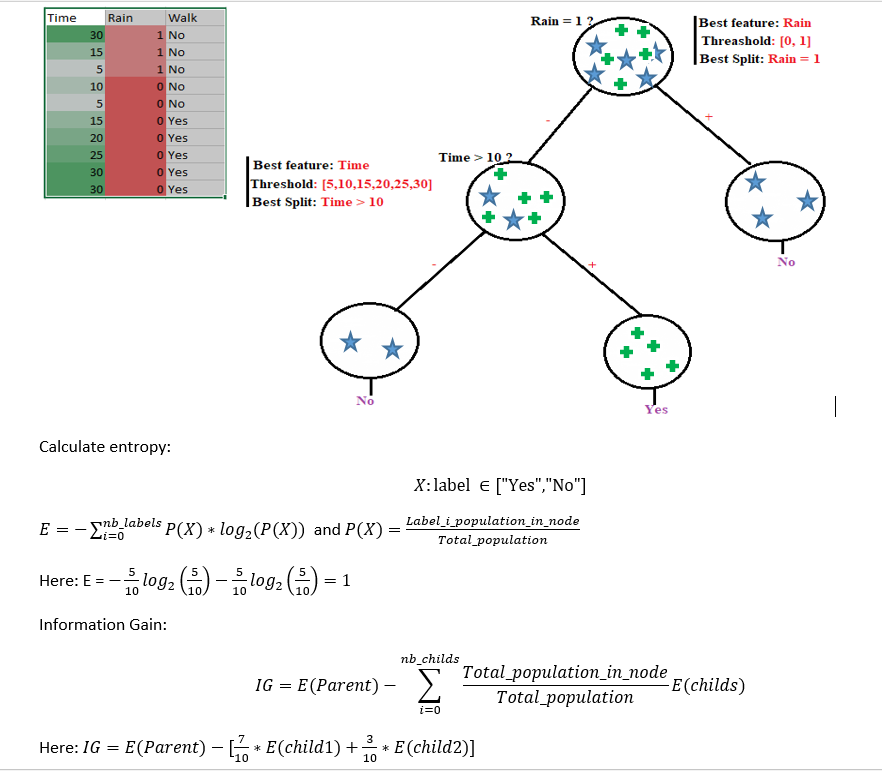

In [18]:
from IPython.display import Image
Image(filename="decision_tree_formular.png", width=800, height=500)

In [21]:
from collections import Counter
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, * , value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    
    def is_leaf_node(self):
        return self.value is not None

class BuildDecisionTree:
    def __init__(self, min_rows_split=2, max_depth=100, nb_features=None):
        self.min_rows_split = min_rows_split
        self.max_depth = max_depth
        self.nb_features = nb_features
        self.root = None
    
    def fit(self, X, y):
        X = np.array(X)
        self.nb_features = X.shape[1] if not self.nb_features else min(self.nb_features, X.shape[1])
        self.root = self.build_tree(X,y)
    
    def build_tree(self, X, y, depth=0):
        nb_rows, nb_feats = X.shape
        nb_labels = len(np.unique(y))
        if depth >= self.max_depth or nb_labels == 1 or nb_rows < self.min_rows_split:
            leaf_value = Counter(y).most_common(1)[0][0] #Get the most common label in all rows
            return Node(value=leaf_value)
        
        feats_index = np.random.choice(nb_feats, self.nb_features, replace=False) #create self.nb_features random list between 0-nb_feats with no repeat
        #greedy search
        best_feat, best_thresh = self.best_criteria(X, y, feats_index)
        #Generate split
        left_index = np.argwhere(X[:,best_feat] <= best_thresh).flatten()
        right_index = np.argwhere(X[:,best_feat] > best_thresh).flatten()
        #Build Child tree
        left = self.build_tree(X[left_index,:], y[left_index], depth+1)
        right = self.build_tree(X[right_index,:], y[right_index], depth+1)
        return Node(best_feat, best_thresh, left, right)

    
    def best_criteria(self, X, y, feats_index):
        best_gain = -1
        split_col, split_thresh = None, None
        #Loop over features index and then over each threshold
        for col_index in feats_index:
            X_column = X[:,col_index]
            thresholds = np.unique(X_column)
            for  thresh in thresholds:
                gain = self.information_gain(X_column, y, thresh) # Calculate information Gain
                if gain > best_gain:
                    best_gain = gain
                    split_col = col_index
                    split_thresh = thresh
        return split_col, split_thresh
    
    def information_gain(self, x, y, thresh):
        #parent entropy
        parent_entropy = self.entropy(y)
        #Generate split
        left_index = np.argwhere(x <= thresh).flatten()
        right_index = np.argwhere(x > thresh).flatten()

        len_l, len_r = len(left_index), len(right_index)
        if len_l == 0 or len_r == 0:
            return 0
        #Weighted average for childs
        len_y = len(y)
        left_entropy = self.entropy(y[left_index])
        right_entropy = self.entropy(y[right_index])
        childs_entropy = (len_l/len_y)*left_entropy + (len_r/len_y)*right_entropy
        #Info gain
        info_gain = parent_entropy - childs_entropy
        return info_gain
        

    def entropy(self, label):
        hist = np.bincount(label)
        proba = hist / len(label)
        entropy = -np.sum([p * np.log2(p) for p in proba if p > 0])
        return entropy

    #Prediction function
    def predict(self, X):
        X = np.array(X)
        return np.array([self.traverse_tree(x, self.root) for x in X])
    
    def traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self.traverse_tree(x, node.left)
        return self.traverse_tree(x, node.right)

    #Score of prediction
    def score(self, y_true, y_predict):
        return np.sum(y_true == y_predict) / len(y_true)
    


### 5.2. Testing 

#### 5.2.1 Test Build decision Tree

In [22]:
BDT = BuildDecisionTree(max_depth=2)
BDT.fit(X_train, y_train)
predict_bdt = BDT.predict(X_test)
print(predict_bdt)

[0 0 1 ... 1 0 0]


#### 5.2.2 Test Scikit Learn's Decisiopn Tree

In [30]:
DT = DecisionTreeClassifier(max_depth=2)
DT.fit(X_train, y_train)
predict_dt = DT.predict(X_test)
print(predict_dt)

[0 0 0 ... 1 0 0]


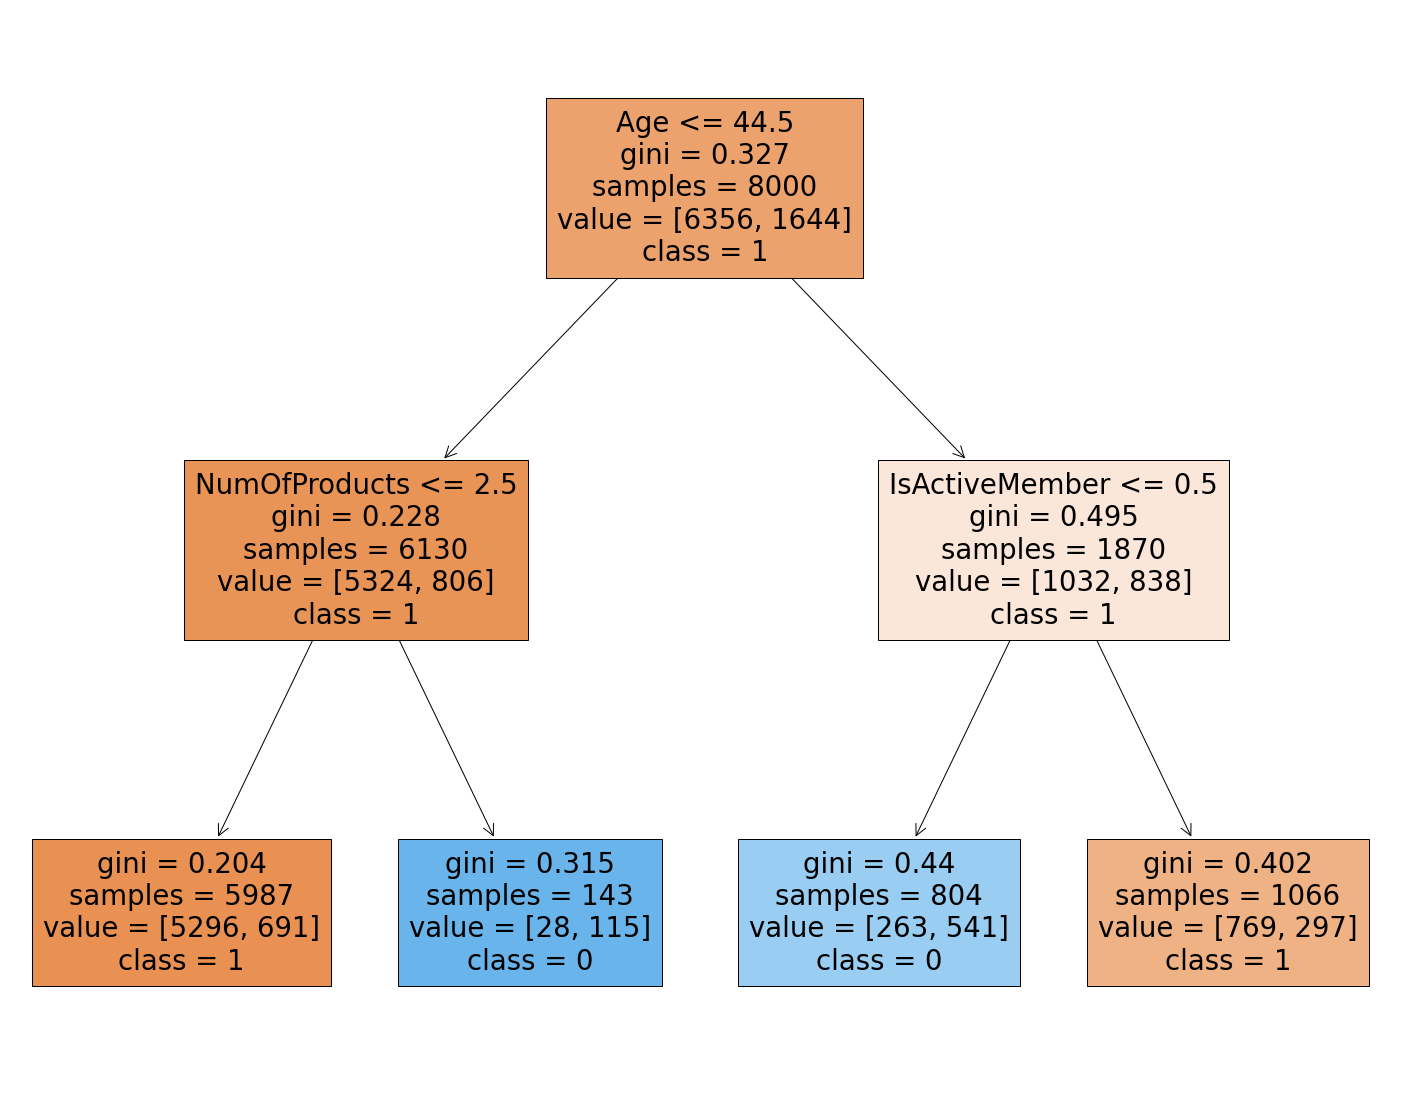

In [32]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT, 
                   feature_names=raw_data.columns,  
                   class_names=raw_data["Exited"].values.astype(str),
                   filled=True)


## 6. Models Evaluation

### 6.1. Models Accuracy

In [ ]:
#Model 1
score_bdt = BDT.score(y_test, predict_bdt)
print("Accuracy of Build Model : ", score_bdt)

#Scikit-learn Model
score_dt = DT.score(X_test, y_test)
print('Accuracy of Scikit-learn Model:',score_dt)

### 6.2. Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, classes=None, title=None):
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0, vmax=1, annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0, vmax=1)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

In [ ]:
#Build Model
predict_train_bdt = BDT.predict(X_train)
cm_bdt = confusion_matrix(y_train, predict_train_bdt)
cm_bdt_norm = cm_bdt/cm_bdt.sum(axis=1)[:, np.newaxis]
classes = np.unique(y)
plot_confusion_matrix(cm_bdt_norm, classes, title="Confusion Matrix for Build Model")

In [ ]:
#Scikit-learn Model
predict_train_dt = DT.predict(X_train)
cm_dt = confusion_matrix(y_train, predict_train_dt)
cm_dt_norm = cm_dt/cm_dt.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_dt_norm, classes=DT.classes_, title="Confusion Matrix for Scikit-learn Model")

In [ ]:
#True Positive
TP = cm_bdt_norm[0][0]
print("True Positive: ", TP)

#False Nagative
FN = cm_bdt_norm[1][1]
print("False Negative: ", FN)

#False Positive
FP = cm_bdt_norm[1][0]
print("False Positive: ",FP)

#True Negative
TN = cm_bdt_norm[0][1]
print("True Negative: ", TN)

## 7. Save Modele

In [34]:
import joblib
joblib.dump(DT, "decision_tree.modele")

['decision_tree.modele']